In [ ]:
import pandas as pd
import pylab as plt
import numpy as np
import statsmodels.api as sm

In [23]:
pd.set_option('display.width',1000)

In [6]:
df = pd.read_csv('logistic_trades.csv')
print(df.tail())

     success  news intensity  price  sentiment
395        0             620  60.00          2
396        0             560  45.60          3
397        0             460  39.45          2
398        0             700  54.75          2
399        0             600  58.35          3


In [7]:
print(df.describe())

          success  news intensity       price  sentiment
count  400.000000      400.000000  400.000000  400.00000
mean     0.317500      587.700000   50.848500    2.48500
std      0.466087      115.516536    5.708502    0.94446
min      0.000000      220.000000   33.900000    1.00000
25%      0.000000      520.000000   46.950000    2.00000
50%      0.000000      580.000000   50.925000    2.00000
75%      1.000000      660.000000   55.050000    3.00000
max      1.000000      800.000000   60.000000    4.00000


In [8]:
print(df.mean())

success             0.3175
news intensity    587.7000
price              50.8485
sentiment           2.4850
dtype: float64


In [11]:
print(pd.crosstab(df['success'],df['sentiment'],rownames=['success']))

sentiment   1   2   3   4
success                  
0          28  97  93  55
1          33  54  28  12


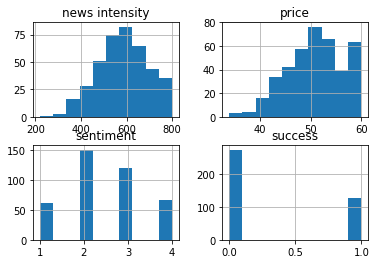

In [19]:
df.hist()
plt.show()

In [21]:
data_dummy = pd.get_dummies(df.sentiment,prefix='sentiment')
print(data_dummy.head())

   sentiment_1  sentiment_2  sentiment_3  sentiment_4
0            0            0            1            0
1            0            0            1            0
2            1            0            0            0
3            0            0            0            1
4            0            0            0            1


In [35]:
data = df[['success','news intensity','price']].join(data_dummy[['sentiment_2','sentiment_3','sentiment_4']])
print(data.head())

   success  news intensity  price  sentiment_2  sentiment_3  sentiment_4
0        0             380  54.15            0            1            0
1        1             660  55.05            0            1            0
2        1             800  60.00            0            0            0
3        1             640  47.85            0            0            1
4        0             520  43.95            0            0            1


In [36]:
data['intersect'] = np.ones(len(data))
print(data.head())

   success  news intensity  price  sentiment_2  sentiment_3  sentiment_4  intersect
0        0             380  54.15            0            1            0        1.0
1        1             660  55.05            0            1            0        1.0
2        1             800  60.00            0            0            0        1.0
3        1             640  47.85            0            0            1        1.0
4        0             520  43.95            0            0            1        1.0


In [37]:
colnames = data.columns[1:]
print(colnames)

Index(['news intensity', 'price', 'sentiment_2', 'sentiment_3', 'sentiment_4', 'intersect'], dtype='object')


In [39]:
Logit_model = sm.Logit(data['success'],data[colnames])
result = Logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 Nov 2017   Pseudo R-squ.:                 0.08292
Time:                        23:47:19   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
news intensity     0.0023      0.001      2.070      0.038       0.000       0.004
price            

In [40]:
print(result.conf_int())

                       0         1
news intensity  0.000120  0.004409
price           0.010246  0.096959
sentiment_2    -1.295751 -0.055135
sentiment_3    -2.016992 -0.663416
sentiment_4    -2.370399 -0.732529
intersect      -6.224242 -1.755716


In [42]:
print(np.exp(result.params))

news intensity    1.002267
price             1.055065
sentiment_2       0.508931
sentiment_3       0.261792
sentiment_4       0.211938
intersect         0.018500
dtype: float64
